# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

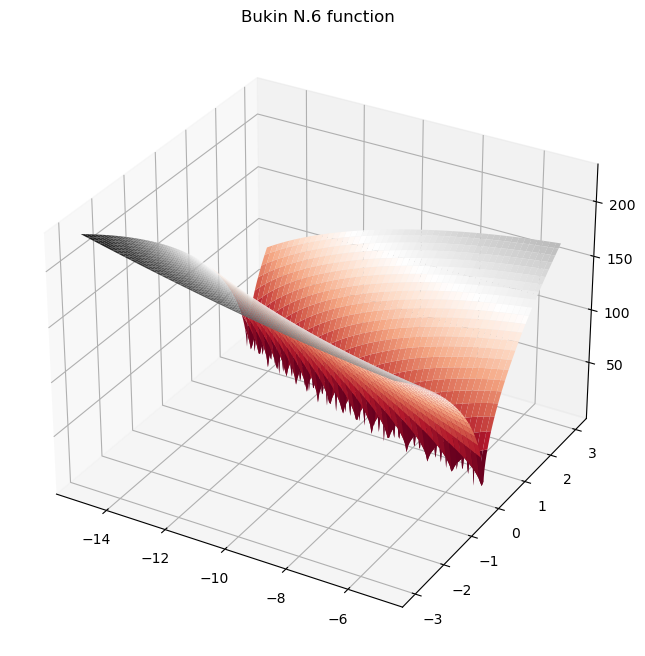

In [16]:

import numpy as np
import matplotlib.pyplot as plt

def bukin(x, y):
    return 100 * np.sqrt(np.abs(y - 0.01 * x ** 2)) + 0.01 * np.abs(x + 10)

x = np.linspace(-15, -5, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
Z = bukin(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z, cmap='RdGy')
plt.title('Bukin N.6 function')
plt.show()



*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [6]:
import numpy as np

def bukin(x, y):
    term1 = 100 * np.sqrt(abs(y - 0.01 * x**2))
    term2 = 0.01 * abs(x + 10)
    return term1 + term2

def hill_climbing(start_x, start_y, step_size=0.1, num_restarts=10):
    # set the best solutions to the current solutions
    best_x, best_y = start_x, start_y
    best_score = bukin(best_x, best_y)

    for i in range(num_restarts):
        x, y = start_x, start_y

        while True:
            # generate a random neighbour
            neighbour_x = x + step_size * np.random.randn()
            neighbour_y = y + step_size * np.random.randn()

            # check if the neighbour is within the function's domain
            if neighbour_x >= -15 and neighbour_x <= -5 and neighbour_y >= -3 and neighbour_y <= 3:
                neighbour_score = bukin(neighbour_x, neighbour_y)

                # if the neighbour is better, move to the neighbour
                if neighbour_score < best_score:
                    best_x, best_y = neighbour_x, neighbour_y
                    best_score = neighbour_score
                    x, y = neighbour_x, neighbour_y
                # otherwise, terminate the current search
                else:
                    break

    return best_x, best_y, best_score

# set the starting point
start_x, start_y = -10, 0

# run the hill climbing algorithm
best_x, best_y, best_score = hill_climbing(start_x, start_y)

# print the results
print(f"Best solution found: x={best_x:.4f}, y={best_y:.4f}, score={best_score:.4f}")

Best solution found: x=-9.9538, y=0.1420, score=92.1274


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [8]:

import random

# Define the knapsack problem parameters
values = [10, 5, 15, 7, 6]
weights = [3, 2, 5, 4, 2]
capacity = 10

# Define the hill climbing algorithm
def hill_climbing():
    # Start with an empty solution
    solution = [0] * len(values)
    best_value = 0
    
    while True:
        # Calculate the value and weight of the current solution
        current_value = sum([v * s for v, s in zip(values, solution)])
        current_weight = sum([w * s for w, s in zip(weights, solution)])
        
        # Generate all neighbors by switching a zero to a one at each position
        neighbors = [solution[:i] + [1 - solution[i]] + solution[i+1:] for i in range(len(solution))]
        
        # Evaluate each neighbor's value and weight
        for neighbor in neighbors:
            neighbor_value = sum([v * s for v, s in zip(values, neighbor)])
            neighbor_weight = sum([w * s for w, s in zip(weights, neighbor)])
            
            # If a neighbor has a higher value and doesn't exceed the knapsack's capacity, update the current solution
            if neighbor_value > current_value and neighbor_weight <= capacity:
                solution = neighbor
                current_value = neighbor_value
        
        # If no better neighbors are found, return the current solution
        if current_value == best_value:
            return solution
        
        # Update the best value found so far
        best_value = current_value

# Run the hill climbing algorithm
solution = hill_climbing()
print("Solution:", solution)
print("Value:", sum([v * s for v, s in zip(values, solution)]))
print("Weight:", sum([w * s for w, s in zip(weights, solution)]))

Solution: [1, 0, 1, 0, 1]
Value: 31
Weight: 10



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  